In [13]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation

In [17]:
SEED = 20
train_dir = 'db/Train'
test_dir = 'db/Test'
IMG_SIZE = (28, 28)
BATCH_SIZE = 32

In [18]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(train_dir, color_mode='grayscale', batch_size=BATCH_SIZE, 
                                        image_size=IMG_SIZE, shuffle=True, seed=SEED, validation_split=0.15, subset='both', label_mode='categorical')
test_ds =  tf.keras.utils.image_dataset_from_directory(test_dir, color_mode='grayscale', batch_size=BATCH_SIZE, 
                                        image_size=IMG_SIZE, shuffle=True, seed=SEED, label_mode='categorical')
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 12000 files belonging to 50 classes.
Using 10200 files for training.
Using 1800 files for validation.
Found 3000 files belonging to 50 classes.


In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28, 1)
(32, 50)


In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32, 3, padding='same', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.output_shape

(None, 14, 14, 32)

In [22]:
model.add(Conv2D(64, 3, padding='same'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.25))
model.output_shape

(None, 7, 7, 64)

In [23]:
model.add(Conv2D(128, 3, padding='valid'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Dropout(0.25))
model.output_shape

(None, 4, 4, 128)

In [24]:
model.add(Flatten())
model.add(Dense(128))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))
model.output_shape

(None, 128)

In [25]:
model.add(Dense(50, activation='softmax'))
model.output_shape

(None, 50)

In [26]:
opt = tf.keras.optimizers.Adam()
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [27]:
history = model.fit(train_ds, epochs=100, validation_data=val_ds)
model.save_weights('train_weights1.h5')

Epoch 1/100
319/319 [==============================] - 10s 31ms/step - loss: 5.8720 - accuracy: 0.0342 - val_loss: 3.5296 - val_accuracy: 0.1022
Epoch 2/100
319/319 [==============================] - 9s 28ms/step - loss: 2.9153 - accuracy: 0.2399 - val_loss: 1.7927 - val_accuracy: 0.4911
Epoch 3/100
319/319 [==============================] - 8s 24ms/step - loss: 1.6238 - accuracy: 0.5396 - val_loss: 1.0611 - val_accuracy: 0.6922
Epoch 4/100
319/319 [==============================] - 8s 25ms/step - loss: 1.1152 - accuracy: 0.6752 - val_loss: 0.6460 - val_accuracy: 0.8028
Epoch 5/100
319/319 [==============================] - 8s 24ms/step - loss: 0.8760 - accuracy: 0.7376 - val_loss: 0.5006 - val_accuracy: 0.8611
Epoch 6/100
319/319 [==============================] - 8s 24ms/step - loss: 0.7202 - accuracy: 0.7819 - val_loss: 0.4018 - val_accuracy: 0.8872
Epoch 7/100
319/319 [==============================] - 8s 24ms/step - loss: 0.6436 - accuracy: 0.8026 - val_loss: 0.3628 - val_accuracy

319/319 [==============================] - 8s 25ms/step - loss: 0.3265 - accuracy: 0.9264 - val_loss: 0.2533 - val_accuracy: 0.9378
Epoch 58/100
319/319 [==============================] - 9s 27ms/step - loss: 0.3118 - accuracy: 0.9293 - val_loss: 0.2680 - val_accuracy: 0.9356
Epoch 59/100
319/319 [==============================] - 8s 24ms/step - loss: 0.3016 - accuracy: 0.9273 - val_loss: 0.3485 - val_accuracy: 0.9139
Epoch 60/100
319/319 [==============================] - 7s 23ms/step - loss: 0.3247 - accuracy: 0.9228 - val_loss: 0.2760 - val_accuracy: 0.9439
Epoch 61/100
319/319 [==============================] - 7s 23ms/step - loss: 0.2605 - accuracy: 0.9363 - val_loss: 0.3069 - val_accuracy: 0.9322
Epoch 62/100
319/319 [==============================] - 8s 26ms/step - loss: 0.3238 - accuracy: 0.9283 - val_loss: 0.3308 - val_accuracy: 0.9356
Epoch 63/100
319/319 [==============================] - 7s 23ms/step - loss: 0.2635 - accuracy: 0.9359 - val_loss: 0.2545 - val_accuracy: 0.943

In [41]:
result = model.evaluate(test_ds)

94/94 [==============================] - 1s 12ms/step - loss: 0.3530 - accuracy: 0.9407


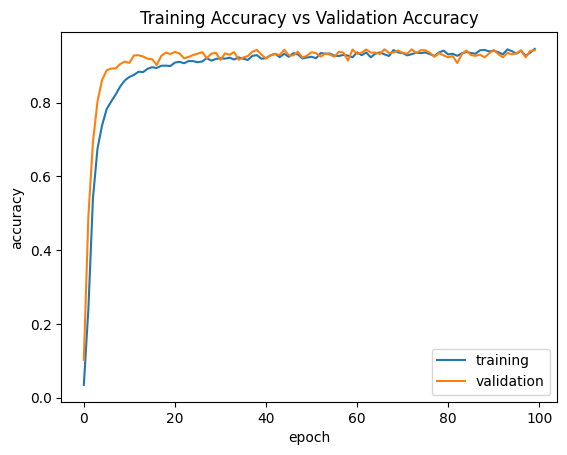

In [42]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='lower right')
plt.show()

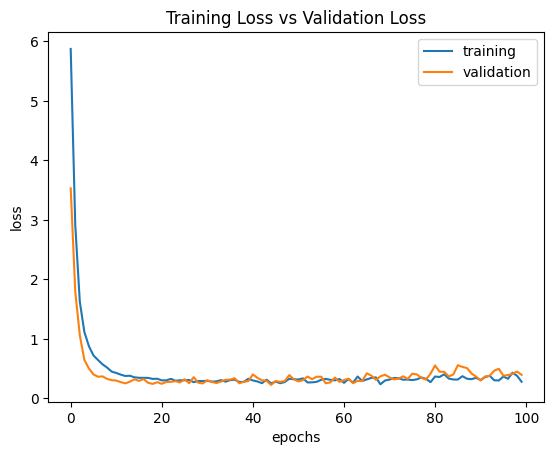

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()